# Lab 2: Advanced Data Visualization with Seaborn

This dataset is extracted from the UCI Dataset Repository whcih has the name "Internet Advertisements." This data was collected during April - July in 1998 at the golden age of the dotcom era. Thus, the data shows us information about how many images in the websites were ad and nonads with additional image information details.

In [6]:
import pandas as pd
import pprint

# This loads the data
df = pd.read_csv("ad.data", header=None, na_values="?")

## Here is the example dataframe of the data

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170,94,0.5529,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3277,?,?,?,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


Now we parse the ad.names file to get the list of column names.

In [12]:
# Function to parse the ad.names file and extract the column names
def parse_ad_names(filepath):
    columns = []
    # Open file and split the names as separate elements
    with open(filepath, "r", encoding="latin1") as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith('|'):
                continue
            if ':' in line:
                name = line.split(':')[0].strip()
                columns.append(name)
    # Add final class type in the end
    if columns[-1] != "class":
        columns.append("class")
    return columns

# Print statements
column_names = parse_ad_names("ad.names")
print(f"Found {len(column_names)} columns.")

Found 1559 columns.


Then, we connect the column names to the dataframe.

In [10]:
df.columns = column_names  # use the parsed column names

We can see the column names below.

In [11]:
pprint.pprint(df.columns.tolist())

['height',
 'width',
 'aratio',
 'local',
 'url*images+buttons',
 'url*likesbooks.com',
 'url*www.slake.com',
 'url*hydrogeologist',
 'url*oso',
 'url*media',
 'url*peace+images',
 'url*blipverts',
 'url*tkaine+kats',
 'url*labyrinth',
 'url*advertising+blipverts',
 'url*images+oso',
 'url*area51+corridor',
 'url*ran+gifs',
 'url*express-scripts.com',
 'url*off',
 'url*cnet',
 'url*time+1998',
 'url*josefina3',
 'url*truluck.com',
 'url*clawnext+gif',
 'url*autopen.com',
 'url*tvgen.com',
 'url*pixs',
 'url*heartland+5309',
 'url*meadows+9196',
 'url*blue',
 'url*ad+gif',
 'url*area51',
 'url*www.internauts.ca',
 'url*afn.org',
 'url*ran.org',
 'url*shareware.com',
 'url*baons+images',
 'url*area51+labyrinth',
 'url*pics',
 'url*image+navigate',
 'url*pool+images',
 'url*carousel.org',
 'url*members.accessus.net',
 'url*cmp+flowsoft010',
 'url*smallb+gif',
 'url*www.FlowSoft.com',
 'url*kandinsky',
 'url*csuhayward.edu',
 'url*www.yahoo.co.uk',
 'url*ibitexas.com',
 'url*www.haestad.co

In [17]:
df["ancurl*www.amazon.com"] = df["ancurl*www.amazon.com"].astype(int)

# Histogram Plot

Below we can see a plot where the number of instances in the dataset where the early amazon.com had no image and images on the website.

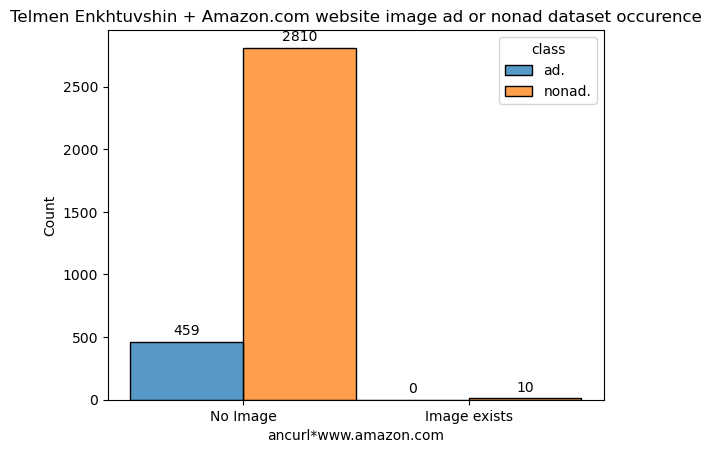

<Figure size 640x480 with 0 Axes>

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot discrete histogram
ax = sns.histplot(data=df, x="ancurl*www.amazon.com", hue="class", discrete=True, multiple="dodge")


# Center ticks directly under bars
ax.set_xticks([0, 1])  # If bars are at 0 and 1

# Ticks
ax.set_xticklabels(["No Image", "Image exists"])

# Add count labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, rotation=0)

plt.title("Telmen Enkhtuvshin + Amazon.com website image ad or nonad dataset occurence");
plt.show()
plt.savefig('Telmen_Enkhtuvshin+histogram_plot.png', dpi=300, bbox_inches='tight')


### From this graph, we can see the most instances in the dataset did not detect any image in the amazon website and only 10 nonad images were detected for the entire data collection. The expressiveness of this graph is satisfactory such that only the relavant information and complete information are shown. Moreover, the effectiveness is also fulfilled such that comparison between bars is easy.

# Violin Plot

Now we will look at aspect ratio distribution in the dataset through a Violin Plot. The two types of classes of ad and nonad are shown side by side to compare the differences.

In [36]:
df["aratio"] = pd.to_numeric(df["aratio"], errors="coerce")

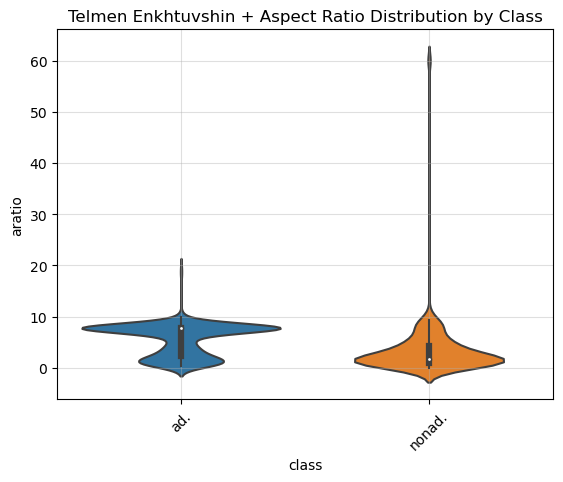

<Figure size 640x480 with 0 Axes>

In [74]:
sns.violinplot(data=df, x="class", y="aratio")

plt.xticks(rotation=45)  # Rotate labels
plt.title("Telmen Enkhtuvshin + Aspect Ratio Distribution by Class")
plt.grid(alpha=0.4)
plt.show()
plt.savefig('Telmen_Enkhtuvshin+violin_plot.png', dpi=300, bbox_inches='tight')


### From this plot, we can see that mostly ads have a fixed range of aspect ratio where the mode lies around the range 5-9. But compared to the nonad images, the mode seems to be greater such that ads were mostly wide images to attract attention on a screen with long images. On the other hand, nonads were typically evenly rectangular images with a few outlier extreme examples. Moreover, this chart is also expressive and effective such that relevant ad and nonad image aspect ratio information is displayed and comparison btween two classes is simple.

# Scatter plot

Now we will look at a scatterplot of images with the attributes height and width on a 2D graph to see patterned clusters of information easily.

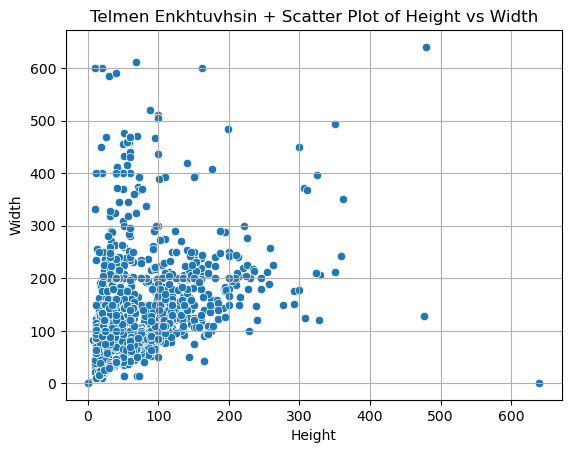

<Figure size 640x480 with 0 Axes>

In [75]:
df["height"] = pd.to_numeric(df["height"], errors="coerce")
df["width"] = pd.to_numeric(df["width"], errors="coerce")

sns.scatterplot(data=df, x="height", y="width")


# Add titles and labels
plt.title("Telmen Enkhtuvhsin + Scatter Plot of Height vs Width")
plt.xlabel("Height")
plt.ylabel("Width")

# Show plot
plt.grid()
plt.show()
# Saving
plt.savefig('Telmen_Enkhtuvshin+scatter_plot.png', dpi=300, bbox_inches='tight')

### From this graph, we can see the most images are contained in ranges 0-300 of both x and y axes with some extreme outliers. This graph is expressive such that all image data points are shown and effective such that the cluster of points can be easily identified.

# Regression Plot

Here, we will add a regression line to the scatterplot to create a Regression Plot.

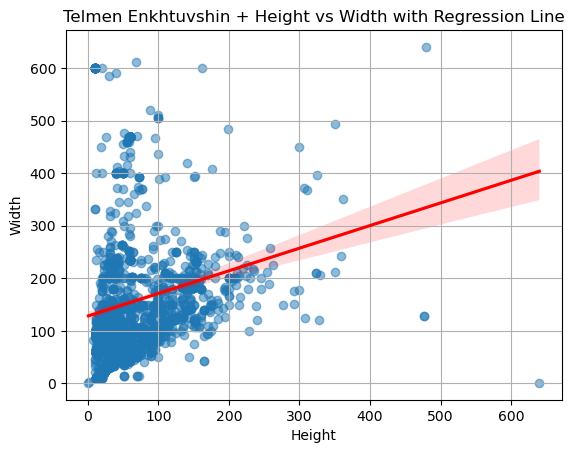

<Figure size 640x480 with 0 Axes>

In [76]:
# Scatter plot with regression line
sns.regplot(data=df, x="height", y="width", scatter_kws={'alpha':0.5}, line_kws={"color": "red"})


plt.title("Telmen Enkhtuvshin + Height vs Width with Regression Line")
plt.xlabel("Height")
plt.ylabel("Width")
plt.grid()
plt.show()
# Saving
plt.savefig('Telmen_Enkhtuvshin+regression_plot.png', dpi=300, bbox_inches='tight')

### From this regression line, we can see a general trend where height and weight increases with each other but slightly favoring height with some outliers. This means as the images get wider, they get more taller in general. This is perfectly expressive and captures all the relevant data as well as effective enough to show clusters of data and image size trends across all image instances.

# Heatmap Plot

We will now use Heatmap Plot to look into ad and nonad images that were hosted locally or externally linked. Local values of '1' means it is hosted locally and '0' otherwise. The code below oragnizes the data by grouping it by class and local type value.

In [66]:
local_counts = df.groupby(['class', 'local']).size().unstack(fill_value=0)
print(local_counts)

local   0.0   1.0
class            
ad.     102   352
nonad.  658  2152


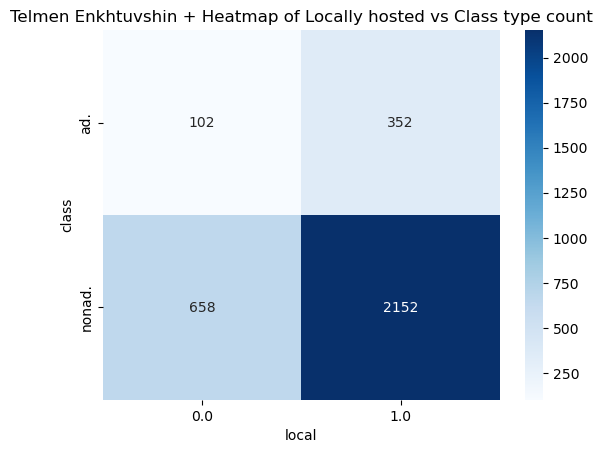

<Figure size 640x480 with 0 Axes>

In [77]:
# Create a heatmap to visualize the counts of 'local' for each 'class'
sns.heatmap(local_counts, annot=True, cmap='Blues', fmt='d', cbar=True)

# Show the plot
plt.title("Telmen Enkhtuvshin + Heatmap of Locally hosted vs Class type count")
plt.show()
# Save the plot as an image file
plt.savefig('Telmen_Enkhtuvshin+heatmap_plot.png', dpi=300, bbox_inches='tight')

### From this plot, we can see that locally hosted nonad images dominated most of the dataset instances with 2152 counts. With this knowledge, we can see that in 1998, websites mostly used nonad local images for display on the webpages. Coming next is externally linked locally hosted nonad images with 658 count. Overall, we have good expressiveness that shows compelete data about image locality and acceptable effectiveness that indicates easy data comparison and understanding.

# Saving Visualizations

Under each plot, the graphs have been saved with unique names after rendering them on the page.